In [1]:
#Finding Communities in a graph (Brute Force Method) - 1

In [3]:
import networkx as nx
import itertools

In [18]:
def communities_brute(G):
    nodes = G.nodes()
    n = G.number_of_nodes()
    
    first_community = []
    for i in range(1,int(n/2+1)):
        comb = [list(x) for x in itertools.combinations(list(nodes), i)]
        first_community.extend(comb)
    
    second_community = []
    for i in range(len(first_community)):
        l = list(set(nodes) - set(first_community[i]))
        second_community.append(l)
    
    num_intra_edges1 = []
    num_intra_edges2 = []
    num_inter_edges = []
    ratio = [] #no of intra/number of inter community edges
    
    for i in range(len(first_community)):
        num_intra_edges1.append(G.subgraph(first_community[i]).number_of_edges())
    for i in range(len(second_community)):
        num_intra_edges2.append(G.subgraph(second_community[i]).number_of_edges())
    
    e = G.number_of_edges()
    for i in range(len(first_community)):
        num_inter_edges.append(e-num_intra_edges1[i]-num_intra_edges2[i])
        
    #find the ratio
    for i in range(len(first_community)):
        ratio.append(float((num_intra_edges1[i]+num_intra_edges2[i])/2))
    max_value = max(ratio)
    max_index = ratio.index(max_value)
    
    print((first_community[max_index]),(second_community[max_index]))
    

In [19]:
G = nx.barbell_graph(5,0)

In [20]:
communities_brute(G)

[0, 1, 2, 3, 4] [5, 6, 7, 8, 9]


In [21]:
import matplotlib.pyplot as plt

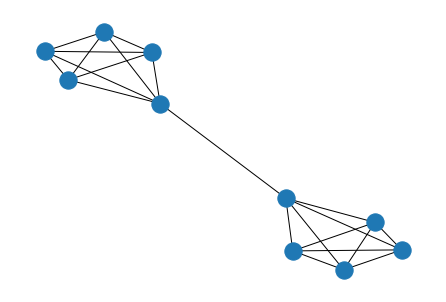

In [22]:
nx.draw(G)

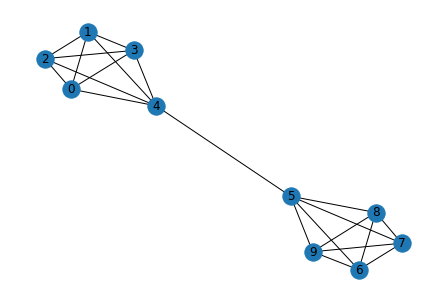

In [23]:
nx.draw(G,with_labels=1)